# O que aprenderei neste módulo?

Qual o caminho para treinar uma IA com oq aprendemos até agora?

<ol>
    <li>Preparar dados</li>
    <li>construir o modelo</li>
    <li>ajustar o modelo aos dados (treinamento)</li>
    <li>fazer previsões e avaliar um modelo (inferência)</li>
    <li>salvar e carregar o modelo</li>
    <li>juntar tudo</li>
</ol>

In [86]:
# Importando bibliotecas

import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn # nn contém todos os blocos de construção do PyTorch para redes neurais

## Machine Learn é dividido em 2 partes

<ol>
    <li>Tratar dados e os Transformar em Números</li>
    <li>Escolher ou construir um modelo para aprender da melhor forma possivel</li>
</ol>

Para evitar ter que pegar outros dados no momento, iremos criar os nossos dados utilizando Regrassão Linear

In [87]:
# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # Tensor 1 - Entrada

weight = 0.7
bias = 0.3
y = weight * X + bias                               # Tensor 2 - Saida

# Dividir os dados em treino, teste e validação

Por enquanto, vou dividir apenas em Treino e Teste

In [88]:
# Dividindo em Treino e Test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [89]:
# Função para ajudar na vizualização dos dados

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  
  #Plots training data, test data and compares predictions.
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # Plot training data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")    # Plot test data in green

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")   # Plot the predictions in red (predictions were made on the test data)

  plt.legend(prop={"size": 14}) # Show the legend

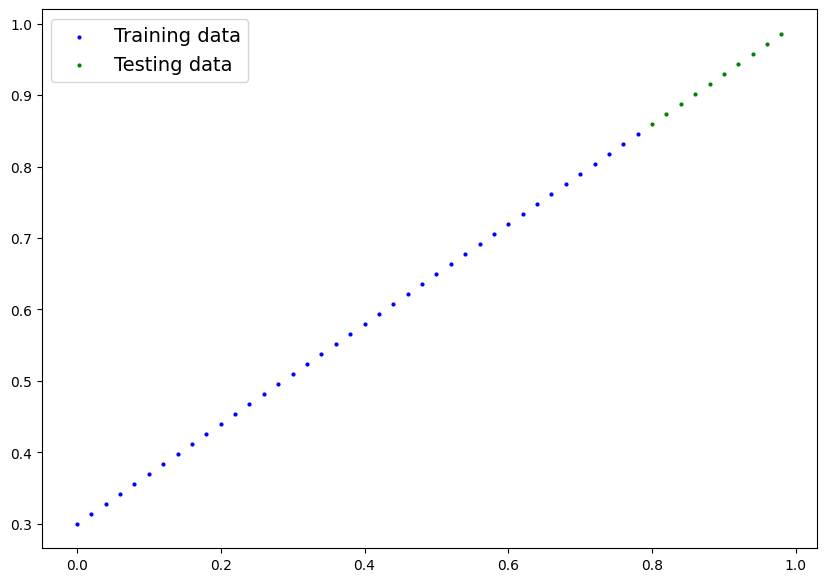

In [90]:
plot_predictions()

In [91]:
class LinearRegressionModel(nn.Module): # nn.Model
    def __init__(self):
        super().__init__()

        # nn.Parameter
        self.weights = nn.Parameter(torch.randn(1,                 #comece com pesos aleatórios 
                                                dtype=torch.float, # Pytorch funciona bem com float32 como padrão
                                                requires_grad=True # podemos atualizar esse valor com gradiente descendente?
                                                )
                                   )
        
        self.bias = nn.Parameter(torch.randn(1,                    #comece com pesos aleatórios 
                                                dtype=torch.float, # Pytorch funciona bem com float32 como padrão
                                                requires_grad=True # podemos atualizar esse valor com gradiente descendente?
                                            )
                                )

    # Forward define o calculo no modelo
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



## Layers

Uma layer é um bloco de processamento dentro de uma rede neural.
Ela recebe um tensor como entrada, faz uma transformação matemática e produz outro tensor como saída.

<br><hr>

### PyTorch tem quatro modelos essenciais (mais ou menos) que você pode usar para criar quase qualquer tipo de rede neural que você possa imaginar.

<ol>
    <li>torch.nn</li>
    Contém todos os blocos de construção para gráficos computacionais (essencialmente uma série de cálculos executados de uma maneira específica).
    <br><br>
    <li>torch.nn.Parameter</li>
    Armazena tensores que podem ser usados ​​com nn.Module. Se os gradientes require_grad=True (usados ​​para atualizar os parâmetros do modelo por meio da descida do gradiente) forem calculados automaticamente, isso geralmente é chamado de "autograd"
    <br><br>
    <li>torch.nn.Module</li>
    A classe base para todos os módulos de rede neural, todos os blocos de construção de redes neurais são subclasses. Se você estiver construindo uma rede neural no PyTorch, seus modelos deverão ser uma subclasse nn.Module. Requer que um método forward() seja implementado.
    <br><br>
    <li>torch.optim</li>
    Contém vários algoritmos de otimização (eles informam aos parâmetros do modelo armazenados em nn.Parameter como alterar melhor para melhorar a descida do gradiente e, por sua vez, reduzir a perda).
    <br><br>
    <li>def forward()</li>
    Todas as subclasses nn.Module requerem um método forward(), que define o cálculo que ocorrerá nos dados passados ​​para o nn.Module específico (por exemplo, a fórmula de regressão linear acima).
</ol>

Em resumo:
<ol>
    <li>nn.Module contém os blocos de construção maiores (camadas)</li>
    <li>nn.Parameter contém os parâmetros menores, como pesos e tendências (junte-os para formar nn.Module(s))</li>
    <li>forward() informa aos blocos maiores como fazer cálculos nas entradas (tensores cheios de dados) dentro de nn.Module(s)</li>
    <li>torch.optim contém métodos de otimização sobre como melhorar os parâmetros dentro de nn.Parameter para representar melhor os dados de entrada</li>
</ol>


In [92]:
# Seed
torch.manual_seed(42)

# Instancia do Modelo
model_0 = LinearRegressionModel()

# Checa os nn.Parameter que criamos
print(list(model_0.parameters()))

# Também podemos obter o estado (o que o modelo contém) do modelo usando .state_dict()
print("\n", model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


## Fazendo previsões usando torch.inference_mode()

In [93]:
with torch.inference_mode(): # Ideal para inferência (previsão), não para treino
    y_preds = model_0(X_test)

# Inferência é quando um modelo já treinado faz uma previsão.

# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


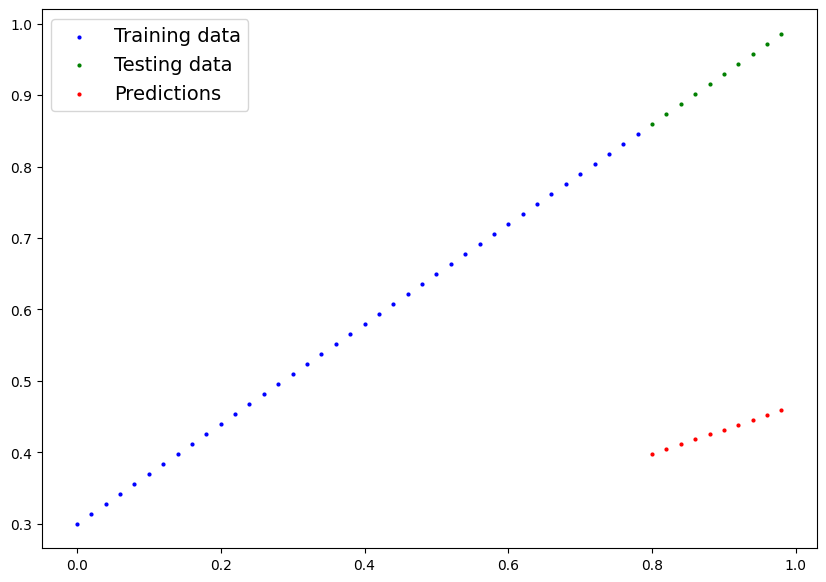

In [94]:
# Checagem dos resultados

plot_predictions(predictions=y_preds)

Está longe do esperado, mas isso é obvio, pois estamos apenas utilizando números aleatórios para gerar essa previsão. então algo precisa ser feito...
<br><hr>

# Treinando o Modelo

Para corrigir isso, podemos atualizar seus parâmetros internos (também me refiro aos parâmetros como padrões), os pesos e valores de polarização que definimos aleatoriamente usando nn.Parameter() e torch.randn() para ser algo que melhor represente os dados.

Precisamos de 2 funções
<ol>
<li>Funções de perda(loos function): mostra o quão erradas estão as previsões do modelo - existem algumas prontas em torch.nn</li>

- Dependendo do tipo de problema em que você está trabalhando, dependerá de qual função de perda e de qual otimizador você usa.

- No entanto, existem alguns valores comuns que funcionam bem, como o SGD (descida gradiente estocástica) ou o otimizador Adam. E a função de perda MAE (erro médio absoluto) para problemas de regressão (previsão de um número) ou função de perda de entropia cruzada binária para problemas de classificação (previsão de uma coisa ou de outra).

- Para o nosso problema, como estamos prevendo um número, vamos usar MAE (que está em torch.nn.L1Loss()) no PyTorch como nossa função de perda.

- O erro absoluto médio (MAE, em PyTorch: torch.nn.L1Loss) mede a diferença absoluta entre dois pontos (previsões e rótulos) e, em seguida, calcula a média de todos os exemplos.

<li>params são os parâmetros do modelo alvo que você deseja otimizar (por exemplo, os pesos e valores de tendência que definimos aleatoriamente antes).</li>

- Optimizer: Ele usa o erro calculado para ajustar os pesos, tentando diminuir o erro na próxima tentativa. - existem algumas prontas em torch.optim

- Usaremos SGD, torch.optim.SGD(params, lr) onde:

- params são os parâmetros do modelo alvo que você deseja otimizar (por exemplo, os pesos e valores de tendência que definimos aleatoriamente antes).
- lr é a taxa de aprendizado na qual você gostaria que o otimizador atualizasse os parâmetros, maior significa que o otimizador tentará atualizações maiores (às vezes podem ser muito grandes e o otimizador não funcionará), menor significa que o otimizador tentará atualizações menores (às vezes podem ser muito pequenas e o otimizador demorará muito para encontrar os valores ideais). A taxa de aprendizado é considerada um hiperparâmetro (porque é definida por um engenheiro de aprendizado de máquina). Os valores iniciais comuns para a taxa de aprendizagem são 0,01, 0,001, 0,0001; no entanto, também podem ser ajustados ao longo do tempo (isso é chamado de programação da taxa de aprendizagem).
</ol>

In [95]:
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_0.parameters(), # parâmetros do modelo alvo para otimizar
                           lr=0.001 # taxa de aprendizado -- Learn rate -- quanto o otimizador deve alterar os parâmetros em cada etapa, maior=mais (menos estável), menor=menos (pode levar muito tempo)
                           )

# Loop de treino

Agora que temos o modelo e as funções de perda e otimização, precisamos fazer um loop de treino e teste, comparando feature e labels

Para o loop de treinamento, construiremos as seguintes etapas:

<ol>

<li>Passar por cada um dos elementos</li>

- O modelo passa por todos os dados de treinamento uma vez, realizando os cálculos da função forward().
- model(x_train)

<li>Calcula a perda</li>

- Os resultados do modelo (previsões) são comparados com a verdade básica e avaliados para ver até que ponto estão errados.
- loss = loss_fn(y_pred, y_train)

<li>zera os gradiantes</li>

- Os gradientes dos otimizadores são definidos como zero (eles são acumulados por padrão) para que possam ser recalculados para a etapa de treinamento específica.
- optimizer.zero_grad()

<li>Execute retropropagação na perda</li>

- Calcula o gradiente da perda em relação a cada parâmetro do modelo a ser atualizado (cada parâmetro com require_grad=True). Isso é conhecido como retropropagação, portanto, "para trás"
- loss.backward()

<li>Atualize o otimizador (gradiente descendente)</li>

- Atualize os parâmetros com require_grad=True em relação aos gradientes de perda para melhorá-los.
- optimizer.step()

</ol>

<img src="01_ptyorch_trining_loop.png" style="display:block; margin:auto;">

Ainda, depois do treinamento, é importante fazer comparações com os dados de testes(no caso, vaçidação), para observar se há overfliting.

Vamos colocar tudo isso junto e observar o comportamento de 100 epocas de treinamentoe comparando os valores a cada 10 epocas

In [96]:
torch.manual_seed(42)

# Número de epocas
EPOCAS = 2000

# criando listas vazias para comparar os resultados
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(EPOCAS):
    ### Treino

    # Coloca o modelo no modo de treino
    model_0.train()

    # 1. passa por cada elemento
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. calcula a perda
    loss = loss_fn(y_pred, y_train)

    # 3. zera os gradientes
    optimizer.zero_grad()

    # 4. calcula o gradiente da perda em relação a cada parâmetro treinável do modelo usando backpropagation.
    loss.backward()

    # 5. atualiza os pesos do optmizer
    optimizer.step()

    ### Teste

    # Coloca o modelo no modo teste.
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Passa por cada elemento do teste
        test_pred = model_0(X_test)

        # 2. calcula perda
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        # previsões vêm no tipo de dados torch.float, portanto, as comparações precisam ser feitas com tensores do mesmo tipo
        
        if epoch % 1 == 0:
            # printa oq esta acontecendo
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Epoch: 1 | MAE Train Loss: 0.3117292523384094 | MAE Test Loss: 0.4918419420719147 
Epoch: 2 | MAE Train Loss: 0.3105771541595459 | MAE Test Loss: 0.49049490690231323 
Epoch: 3 | MAE Train Loss: 0.3094250559806824 | MAE Test Loss: 0.48914775252342224 
Epoch: 4 | MAE Train Loss: 0.30827295780181885 | MAE Test Loss: 0.4878006875514984 
Epoch: 5 | MAE Train Loss: 0.3071208596229553 | MAE Test Loss: 0.4864535331726074 
Epoch: 6 | MAE Train Loss: 0.3059687614440918 | MAE Test Loss: 0.4851064682006836 
Epoch: 7 | MAE Train Loss: 0.3048166334629059 | MAE Test Loss: 0.48375946283340454 
Epoch: 8 | MAE Train Loss: 0.30366456508636475 | MAE Test Loss: 0.48241233825683594 
Epoch: 9 | MAE Train Loss: 0.3025124669075012 | MAE Test Loss: 0.48106521368026733 
Epoch: 10 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4797181189060211 
Epoch: 11 | MAE Train Loss: 0.30020827054977417 | MAE Test Loss: 0.47837108373

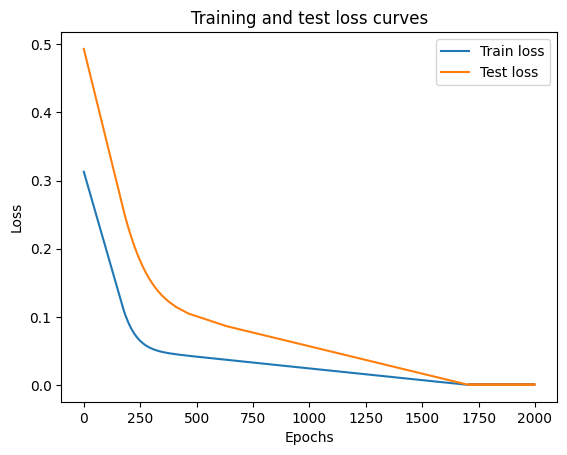

In [97]:
# Plot da curva de perda
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Uau! Quão legal é isso?

Nosso modelo chegou muito perto de calcular os valores originais exatos de peso e viés (e provavelmente chegaria ainda mais perto se o treinássemos por mais tempo).

Provavelmente nunca os adivinharíamos perfeitamente (especialmente ao usar conjuntos de dados mais complicados), mas tudo bem, muitas vezes você pode fazer coisas muito legais com uma aproximação aproximada.

Essa é a ideia do aprendizado de máquina e do aprendizado profundo. Existem alguns valores ideais que descrevem nossos dados e, em vez de descobri-los manualmente, podemos treinar um modelo para descobri-los programaticamente.

---

## Fazendo previsões com um modelo PyTorch pre-treinado(inferencia)

Há três coisas a serem lembradas ao fazer previsões (também chamadas de inferência) com um modelo PyTorch

- Defina o modelo em modo de avaliação (model.eval()).
- Faça as previsões usando o gerenciador de contexto do modo de inferência (com torch.inference_mode(): ...).
- Todas as previsões devem ser feitas com objetos no mesmo dispositivo (por exemplo, dados e modelo apenas na GPU ou dados e modelo apenas na CPU).

Os dois primeiros itens garantem que todos os cálculos e configurações úteis que o PyTorch usa nos bastidores durante o treinamento, mas que não são necessários para inferência, estejam desativados (isso resulta em um cálculo mais rápido). E o terceiro garante que você não encontrará erros entre dispositivos.

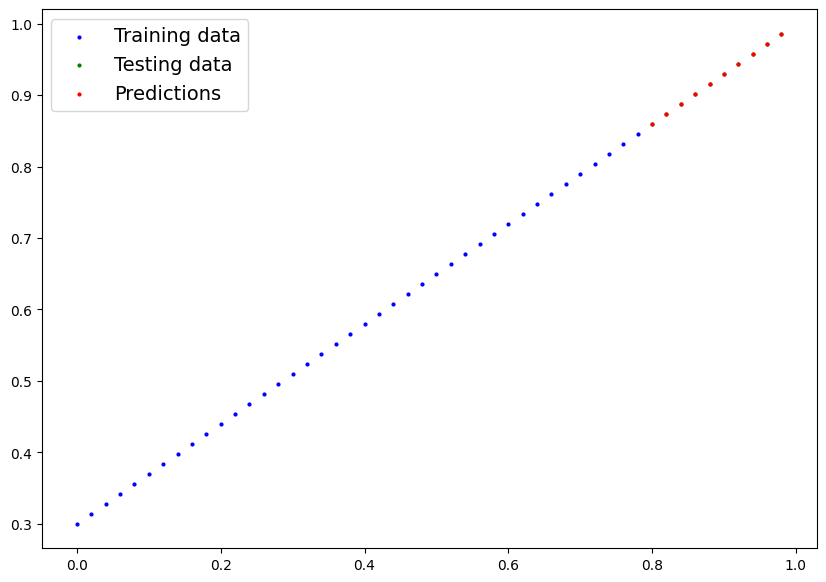

In [98]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

## Salvando e carregando o modelo

Depois do modelo treinado, você irá querer salva-lo para usar em alguma aplicação, então é isso que vamos aprender agora

Para salvar e carregar modelos no PyTorch, existem três métodos principais que você deve conhecer

- torch.save: Salva um objeto serializado em disco usando o pickle utility do Python
- torch.load: Usa os recursos de do pickle unpickling para desserializar e carregar arquivos de objetos
- torch.nn.Module.load_state_dict: Carrega o dicionário de parâmetros de um modelo (model.state_dict()) usando um objeto state_dict() salvo.

A maneira recomendada de salvar e carregar o modelo para fazer inferência(previsão) é salvar e carregar com state_dict(), veja o passo a passo
<ol>
    <li>Criamos diretorio para salvar o modelo</li>
    <li>Criamos um caminho de arquivo para salvar o modelo</li>
    <li>chamamos torch.save(state_dict(), nome_do_arquivo)</li>
</ol>

obs.: por convenção, o modelo deve ser salvo com .pt ou .pth

In [99]:
import os

# Criando o caminho relativo para salvar o modelo
MODEL_SAVE_PATH = "01.1_Modelo.pth"
oq_salvar = model_0.state_dict() # Salvar só o state_dict() (pesos do modelo) é melhor
# Se você salvar o modelo inteiro, ele pode quebrar depois que você mudar o código ou mover arquivos.

torch.save(oq_salvar, MODEL_SAVE_PATH)

## Carregando modelo salvo

Passo a passo
- Criar uma nova instancia de um mesmo modelo(com pesos aleatórios)
- Carregar o state_dict com torch.load()
- Aplicar os pesos no novo modelo com .load_state_dict()

Para fazer infência:
- model.eval()
- with torch.inference_mode():



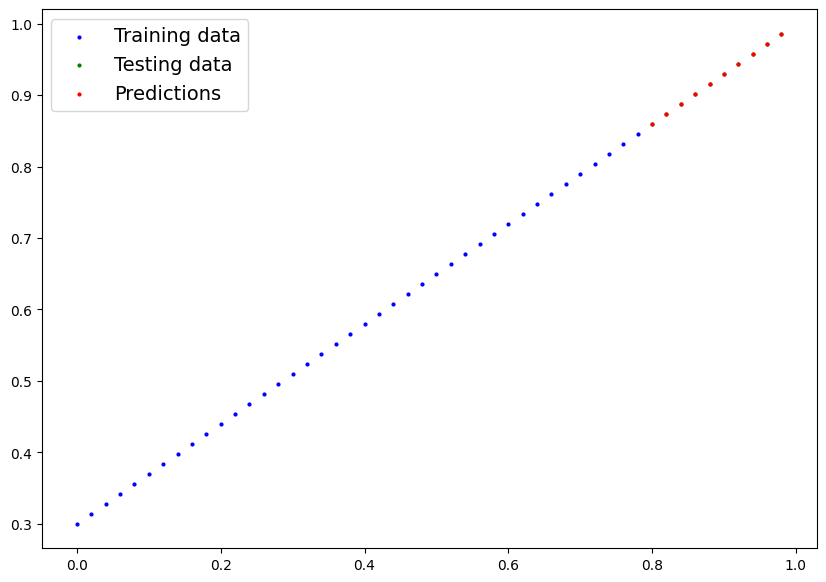

In [100]:
# Instanciando modelo novo
modelo_carregado = LinearRegressionModel()

modelo_carregado.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

modelo_carregado.eval()

with torch.inference_mode():
    previsoes = modelo_carregado(X_test)

plot_predictions(predictions=previsoes)

.load apenas lê os pesos do arquivo e retorna um dicionario<br>
.load_state_dict() coloca os pesos dentro do modelo